<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)" data-toc-modified-id="-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)</center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-0." data-toc-modified-id="Task-0.-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Task 0.</a></span></li><li><span><a href="#Task-1." data-toc-modified-id="Task-1.-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>Task 1.</a></span></li><li><span><a href="#Task-2:" data-toc-modified-id="Task-2:-1.0.0.3"><span class="toc-item-num">1.0.0.3&nbsp;&nbsp;</span>Task 2:</a></span></li><li><span><a href="#Task-3:" data-toc-modified-id="Task-3:-1.0.0.4"><span class="toc-item-num">1.0.0.4&nbsp;&nbsp;</span>Task 3:</a></span></li><li><span><a href="#Task-4:" data-toc-modified-id="Task-4:-1.0.0.5"><span class="toc-item-num">1.0.0.5&nbsp;&nbsp;</span>Task 4:</a></span></li><li><span><a href="#Task-5:" data-toc-modified-id="Task-5:-1.0.0.6"><span class="toc-item-num">1.0.0.6&nbsp;&nbsp;</span>Task 5:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.7"><span class="toc-item-num">1.0.0.7&nbsp;&nbsp;</span>Вопросы:</a></span></li><li><span><a href="#Task-6:" data-toc-modified-id="Task-6:-1.0.0.8"><span class="toc-item-num">1.0.0.8&nbsp;&nbsp;</span>Task 6:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.9"><span class="toc-item-num">1.0.0.9&nbsp;&nbsp;</span>Вопросы:</a></span></li></ul></li></ul></li></ul></li></ul></div>

# <center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять считайте только первые 1000000 строк.

In [11]:
data_transactions = pd.read_csv("data/transactions.csv", nrows = 1000000, sep =",")
data_mcc = pd.read_csv("data/tr_mcc_codes.csv", sep=";")
data_types = pd.read_csv("data/tr_types.csv", sep=";")
data_gender = pd.read_csv("data/gender_train.csv", sep=",")
data_gender.head()

,customer_id,gender
0,10928546,1
1,69348468,1
2,61009479,0
3,74045822,0
4,27979606,1


#### Task 0.
Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [12]:
result = pd.merge(data_transactions, data_gender, how="left")
result = pd.merge(result, data_types, how="inner")
result = pd.merge(result, data_mcc, how="inner")
result_source = result.copy()
result

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,tr_description,mcc_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих..."
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих..."
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих..."
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих..."
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих..."
...,...,...,...,...,...,...,...,...,...
999579,48819028,388 00:00:00,7993,1200,-8062.84,00000000,0.0,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр
999580,32478197,254 00:00:00,7993,1200,-5367.74,00000181,0.0,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр
999581,32478197,254 00:00:00,7993,1200,-5816.92,00000181,0.0,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр
999582,89619970,21 00:00:00,7993,1200,-67355.01,NaN,NaN,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр


#### Task 1.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [15]:
resultw = result[result.amount<0]
gender_1_mean_waste = (resultw[resultw.gender == 1.0]).amount.mean()
gender_2_mean_waste = (resultw[resultw.gender == 0.0]).amount.mean()
result = abs(gender_2_mean_waste-gender_1_mean_waste)
result

32718.054920224233

#### Task 2:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

In [26]:
resultw["mcc_code+tr_type"] = resultw["mcc_code"].astype(str) + resultw["tr_type"].astype(str)
resultw = resultw[resultw["amount"] < 0]
resultw

C:\Users\romas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,tr_description,mcc_description,mcc_type,mcc_code+tr_type
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",48141030,48141030
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",48141030,48141030
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",48141030,48141030
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",48141030,48141030
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",48141030,48141030
...,...,...,...,...,...,...,...,...,...,...,...
999579,48819028,388 00:00:00,7993,1200,-8062.84,00000000,0.0,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр,79931200,79931200
999580,32478197,254 00:00:00,7993,1200,-5367.74,00000181,0.0,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр,79931200,79931200
999581,32478197,254 00:00:00,7993,1200,-5816.92,00000181,0.0,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр,79931200,79931200
999582,89619970,21 00:00:00,7993,1200,-67355.01,NaN,NaN,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр,79931200,79931200


In [28]:
resultw = resultw.groupby(['mcc_code+tr_type']).filter(lambda x: len(x) >= 10)
resultw

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,tr_description,mcc_description,mcc_type,mcc_code+tr_type
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",48141030,48141030
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",48141030,48141030
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",48141030,48141030
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",48141030,48141030
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",48141030,48141030
...,...,...,...,...,...,...,...,...,...,...,...
999579,48819028,388 00:00:00,7993,1200,-8062.84,00000000,0.0,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр,79931200,79931200
999580,32478197,254 00:00:00,7993,1200,-5367.74,00000181,0.0,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр,79931200,79931200
999581,32478197,254 00:00:00,7993,1200,-5816.92,00000181,0.0,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр,79931200,79931200
999582,89619970,21 00:00:00,7993,1200,-67355.01,NaN,NaN,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр,79931200,79931200


In [29]:
a = resultw.groupby(['mcc_code+tr_type'])['amount'].var()
a.max() / a.min()

9170599.00280999

#### Task 3:
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия	
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    - 5) Плата за получение наличных в АТМ. Россия	 
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

In [31]:
result = result_source.copy()
result = result[result["amount"] > 0]
male = result[result["gender"] == 1]
female = result[result["gender"] != 1]
tr_male = male.groupby(['tr_type'])["amount"].max().sort_values()[:5]
tr_female = female.groupby(['tr_type'])["amount"].max().sort_values()[:5]
tr_male

tr_type
4110     2245.92
2020     2245.92
1010    28803.87
8100    64682.37
6000    79280.83
Name: amount, dtype: float64

In [32]:
tr_female

tr_type
4071     224.59
4051    1122.96
4110    2245.92
4100    5041.86
4210    6115.18
Name: amount, dtype: float64

In [33]:
tr_types[tr_types['tr_type'] == 4110]

,tr_type,tr_description
25,4110,Плата за получение наличных в АТМ. Россия


#### Task 4:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [34]:
result = result_source.copy()
result['tr_day'] = result['tr_datetime'].apply(lambda x: int(x.split(' ')[0]))
result

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,tr_description,mcc_description,tr_day
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",0
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",6
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",8
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",11
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",11
...,...,...,...,...,...,...,...,...,...,...
999579,48819028,388 00:00:00,7993,1200,-8062.84,00000000,0.0,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр,388
999580,32478197,254 00:00:00,7993,1200,-5367.74,00000181,0.0,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр,254
999581,32478197,254 00:00:00,7993,1200,-5816.92,00000181,0.0,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр,254
999582,89619970,21 00:00:00,7993,1200,-67355.01,NaN,NaN,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр,21


In [35]:
uniq = result.groupby('tr_day')['mcc_code'].nunique()
uniq = uniq[uniq > 75].index
result = result[result['tr_day'].isin(uniq)]
result

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,tr_description,mcc_description,tr_day
6,39026145,13 11:17:34,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",13
7,39026145,18 07:39:05,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",18
8,39026145,19 13:24:35,4814,1030,-449.18,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",19
9,39026145,19 13:25:31,4814,1030,-1122.96,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",19
12,39026145,29 11:29:57,4814,1030,-1122.96,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",29
...,...,...,...,...,...,...,...,...,...,...
999577,57513608,245 00:00:00,7993,1200,-102818.02,00000181,1.0,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр,245
999578,57513608,293 00:00:00,7993,1200,-78584.59,00000181,1.0,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр,293
999579,48819028,388 00:00:00,7993,1200,-8062.84,00000000,0.0,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр,388
999582,89619970,21 00:00:00,7993,1200,-67355.01,NaN,NaN,Покупка. Зарубеж. ТУ,Принадлежности для видеоигр,21


In [36]:
tr_mcc_codes[tr_mcc_codes['mcc_description'] == 'Флористика']

,mcc_code,mcc_description
118,5992,Флористика


In [37]:
tr_mcc_codes[tr_mcc_codes['mcc_description'] == 'Ценные бумаги: брокеры/дилеры']

,mcc_code,mcc_description
127,6211,Ценные бумаги: брокеры/дилеры


In [38]:
tr_mcc_codes[tr_mcc_codes['mcc_description'] == 'Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков']

,mcc_code,mcc_description
91,5813,"Бары, коктейль-бары, дискотеки, ночные клубы и..."


In [39]:
male = result[result['gender'] == 1].groupby('mcc_code').describe()
female = result[result['gender'] != 1].groupby('mcc_code').describe()
m1 = result[result['gender'] == 1].groupby('mcc_code')['amount'].median()
f1 = result[result['gender'] != 1].groupby('mcc_code')['amount'].median()
m1[5992], f1[5992]

(-18865.69, -14486.155)

In [40]:
m1[6211], f1[6211]

(-11229.58, -11229.58)

In [41]:
m1[5813], f1[5813]

(-13475.49, -9095.96)

#### Task 5:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

In [45]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"size": 14, "fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

In [42]:
resuls = result_source.copy()
neg = result[result['amount'] < 0]
pos = result[result['amount'] >= 0]
neg['amount_bucket'] = pd.qcut(neg['amount'],5,labels=['Very High','High','Middle','Low','Very Low'])
pos['amount_bucket'] = 'Income'
result = pd.concat([neg, pos])
result

C:\Users\romas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\romas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,tr_description,mcc_description,tr_day,amount_bucket
6,39026145,13 11:17:34,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",13,Very Low
7,39026145,18 07:39:05,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",18,Very Low
8,39026145,19 13:24:35,4814,1030,-449.18,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",19,Very Low
9,39026145,19 13:25:31,4814,1030,-1122.96,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",19,Very Low
12,39026145,29 11:29:57,4814,1030,-1122.96,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",29,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
999509,88656506,102 00:00:00,5964,6200,1254.79,NaN,1.0,Возврат покупки. Зарубеж. ТУ,Прямой маркетинг — торговля через каталог,102,Income
999510,88656506,102 00:00:00,5964,6200,3166.07,NaN,1.0,Возврат покупки. Зарубеж. ТУ,Прямой маркетинг — торговля через каталог,102,Income
999511,54636579,375 00:00:00,5964,6200,2760.90,00000001,0.0,Возврат покупки. Зарубеж. ТУ,Прямой маркетинг — торговля через каталог,375,Income
999513,75169373,90 00:00:00,5964,6100,82670.36,NaN,1.0,Возврат покупки. ТУ Россия,Прямой маркетинг — торговля через каталог,90,Income


In [43]:
result['tr_hour'] = result['tr_datetime'].apply(lambda x: int(x.split(' ')[1][:2]))
result

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,tr_description,mcc_description,tr_day,amount_bucket,tr_hour
6,39026145,13 11:17:34,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",13,Very Low,11
7,39026145,18 07:39:05,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",18,Very Low,7
8,39026145,19 13:24:35,4814,1030,-449.18,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",19,Very Low,13
9,39026145,19 13:25:31,4814,1030,-1122.96,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",19,Very Low,13
12,39026145,29 11:29:57,4814,1030,-1122.96,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",29,Very Low,11
...,...,...,...,...,...,...,...,...,...,...,...,...
999509,88656506,102 00:00:00,5964,6200,1254.79,NaN,1.0,Возврат покупки. Зарубеж. ТУ,Прямой маркетинг — торговля через каталог,102,Income,0
999510,88656506,102 00:00:00,5964,6200,3166.07,NaN,1.0,Возврат покупки. Зарубеж. ТУ,Прямой маркетинг — торговля через каталог,102,Income,0
999511,54636579,375 00:00:00,5964,6200,2760.90,00000001,0.0,Возврат покупки. Зарубеж. ТУ,Прямой маркетинг — торговля через каталог,375,Income,0
999513,75169373,90 00:00:00,5964,6100,82670.36,NaN,1.0,Возврат покупки. ТУ Россия,Прямой маркетинг — торговля через каталог,90,Income,0


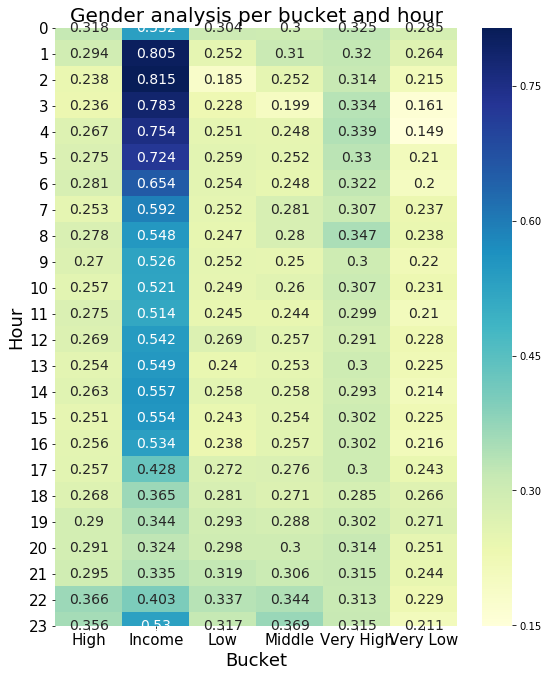

In [46]:
plot_pivot_table(result.fillna(0).pivot_table('gender', index='tr_hour', columns='amount_bucket'))

#### Task 6:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) 2 из полученных MCC-кодов связаны с финансовыми институтами
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

In [47]:
result['tr_day'] = result['tr_datetime'].apply(lambda x: int(x.split(' ')[0]))
result


,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,tr_description,mcc_description,tr_day,amount_bucket,tr_hour
6,39026145,13 11:17:34,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",13,Very Low,11
7,39026145,18 07:39:05,4814,1030,-2245.92,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",18,Very Low,7
8,39026145,19 13:24:35,4814,1030,-449.18,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",19,Very Low,13
9,39026145,19 13:25:31,4814,1030,-1122.96,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",19,Very Low,13
12,39026145,29 11:29:57,4814,1030,-1122.96,NaN,1.0,Оплата услуги. Банкоматы СБ РФ,"Звонки с использованием телефонов, считывающих...",29,Very Low,11
...,...,...,...,...,...,...,...,...,...,...,...,...
999509,88656506,102 00:00:00,5964,6200,1254.79,NaN,1.0,Возврат покупки. Зарубеж. ТУ,Прямой маркетинг — торговля через каталог,102,Income,0
999510,88656506,102 00:00:00,5964,6200,3166.07,NaN,1.0,Возврат покупки. Зарубеж. ТУ,Прямой маркетинг — торговля через каталог,102,Income,0
999511,54636579,375 00:00:00,5964,6200,2760.90,00000001,0.0,Возврат покупки. Зарубеж. ТУ,Прямой маркетинг — торговля через каталог,375,Income,0
999513,75169373,90 00:00:00,5964,6100,82670.36,NaN,1.0,Возврат покупки. ТУ Россия,Прямой маркетинг — торговля через каталог,90,Income,0


In [48]:
mcc_6 = transactions.groupby(['mcc_code']).filter(lambda x: len(x) >= 60000)['mcc_code'].unique()
mcc_6.shape[0]

5

In [49]:
result = result[result['mcc_code'].isin(mcc_6)]
gr = result.groupby(['mcc_code', 'tr_hour']).agg('mean')["amount"]
gr

mcc_code  tr_hour
4814      0          -7971.387082
          1          -3925.283044
          2          -4073.788348
          3          -4298.896443
          4          -4483.372835
                         ...     
6011      19        -28419.727270
          20        -36049.884059
          21        -71842.829901
          22        -44545.029786
          23        -81382.300588
Name: amount, Length: 120, dtype: float64

In [50]:
gr = gr.unstack()
gr.apply(lambda x: x.sort_values())

tr_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
mcc_code,,,,,,,,,,,,,,,,,,,,,
4829,-226311.002819,-250772.936078,-169554.266337,-158985.615635,-239834.192500,-163311.056051,-139327.122267,-166478.337381,-153408.706817,-157138.529132,...,-176950.460647,-214557.004083,-194659.353565,-200529.552347,-156379.526586,-177036.279412,-201484.345982,-196308.001130,-213834.580304,-223764.486523
6011,-65501.730262,-92364.196959,-125359.475785,-120571.170257,-123602.162563,-101840.631317,-93276.782003,-94448.847133,-73186.658221,-72166.386118,...,-59096.824256,-50105.705499,-56959.706734,-52529.574904,-35136.741591,-28419.727270,-36049.884059,-71842.829901,-44545.029786,-81382.300588
5411,-18175.460520,-13179.065696,-16777.540000,-11996.612564,-14928.363378,-12729.718429,-12239.671685,-11607.646661,-10905.559577,-11881.852712,...,-14993.583034,-14403.839476,-13663.566537,-13855.488244,-14429.179709,-14437.125754,-14725.698775,-15009.082328,-16562.118397,-16272.256915
4814,-7971.387082,-3925.283044,-4073.788348,-4298.896443,-4483.372835,-4236.250163,-4597.286417,-4744.524957,-4798.444204,-5742.045990,...,-6924.009454,-5500.821665,-5367.075976,-5837.418636,-5247.192648,-5219.726413,-5671.193624,-5197.094010,-4969.237740,-4856.813470
6010,69678.452091,38594.316747,22871.280461,24905.122031,37654.665945,31386.245515,39188.164226,62391.106504,53400.056796,56033.863868,...,68270.198146,72115.519725,72282.120717,111339.965624,116850.164798,107265.660978,132223.471514,125295.534494,134734.084331,136914.398421


In [51]:
tr_mcc_codes[tr_mcc_codes['mcc_code'].isin(gr.index)]

,mcc_code,mcc_description
20,4814,"Звонки с использованием телефонов, считывающих..."
22,4829,Денежные переводы
56,5411,"Бакалейные магазины, супермаркеты"
123,6010,Финансовые институты — снятие наличности вручную
124,6011,Финансовые институты — снятие наличности автом...


1,2,4